## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

## Model

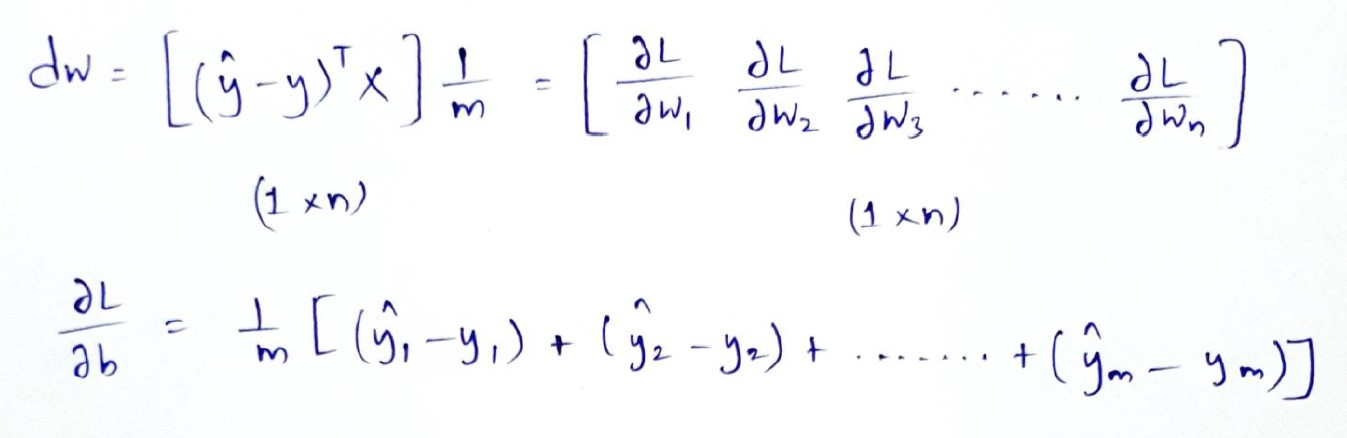

In [ ]:
class Multivariate_Lr:
    def __init__(self,n):
        #initialising weights and bias
        self.w = np.random.randn(1,n)
        self.b = 0
    def pred(self,X):
        y_pred = np.matmul(X, self.w.T)+self.b #(m,n)x(n,1)=(m,1)
        return y_pred
    def Loss(self,y_pred,y):
        m = y.shape[0]
        loss = ((y_pred - y)**2)/(2*m)
        return np.sum(loss)
    def grad(self,X,y):
        m = y.shape[0]
        y_hat = self.pred(X)
        dw = np.matmul((y_hat - y).T , X)*(1/m) #(1,n)
        db = np.sum(y_hat - y)*(1/m) #scalar value
        return dw, db
    def fit(self,X,y,epochs,lr):
        self.w_hist = self.w
        self.b_hist = [self.b]
        Loss = []
        #Storing the initial loss before starting the training
        y_pred = self.pred(X)
        initial_loss = self.Loss(y_pred,y)
        Loss.append(initial_loss)
        for i in range(1,epochs+1):
            dw,db = self.grad(X,y)
            self.w = self.w - lr*dw
            self.b = self.b - lr*db
            y_pred = self.pred(X)
            loss = self.Loss(y_pred, y)
            Loss.append(loss)
            #Storing the updated values of w,b
            self.w_hist = np.append(self.w_hist, self.w, axis = 0)
            self.b_hist.append(self.b)
            #print('Epoch: ',i,'Training Loss: ',loss)
        print('Final Loss: ',loss)
        plt.plot(Loss,'-o')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()



## Data

Dataset Link: https://www.kaggle.com/quantbruce/real-estate-price-prediction/download

In [ ]:
df=pd.read_csv('Real estate.csv')
df.head()

In [ ]:
X=df.iloc[:,2:-1]
X.head()

In [ ]:
y = df.iloc[:,[-1]]
y.head()

# Feature Scaling

In [ ]:
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

In [ ]:
X_scaled.shape

In [ ]:
y = y.to_numpy()
y.shape

In [ ]:
model = Multivariate_Lr(X_scaled.shape[1])

In [ ]:
model.fit(X_scaled,y,50, lr = 0.1)

## Plotting Weights History

In [ ]:
plt.figure(figsize=(15,3))
for i in range(X_scaled.shape[1]):
    plt.subplot(1,X_scaled.shape[1]+1,i+1)
    plt.xlabel('epochs')
    plt.ylabel('W'+str(i))
    plt.plot(model.w_hist[:,i])
plt.subplot(1,X_scaled.shape[1]+1,X_scaled.shape[1]+1)
plt.plot(model.b_hist) 
plt.xlabel('epochs')
plt.ylabel('b')   
plt.tight_layout()
plt.show()

## Testing

In [ ]:
def prediction(model):
    l=[]
    l.append(float(input('Enter House Age: ')))
    l.append(float(input('distance to the nearest MRT station: ')))
    l.append(float(input('number of convenience stores: ')))
    l.append(float(input('Latitude: ')))
    l.append(float(input('Longitude: ')))
    arr = np.asarray([l])
    scaled_arr = sc.transform(arr)
    print('Price of the house per unit area: ', model.pred(scaled_arr)[0][0])

In [ ]:
#7.1, 2175.03, 3, 24.96305, 121.5125

In [ ]:
prediction(model)

In [ ]:
#calculation of error% between actual value and predicted value without using library
y_hat  = [39.81,45.507,52,41,33,47.82,33.61,46.81,49.19,48.55]
y_true = [40.3,46.7,54,39.3,29.3,43.1,32.1,47.3,42.2,37.9]
mean_absolute_percentage_error(y_true, y_hat)